In [33]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt

<b> Cell type: TextRead </b>

# Problem 1: Binary Classifiers
### Problem 1.1: Building Binary Classifiers

Derive classifiers under assumptions below, and use the ML estimators to compute and return the results on a test set.<br><br>
1a) Assume X|Y = -1 ~ N($\mu_-$, $I$) and X|Y = 1 ~ N($\mu_+$, $I$). <emph>(Same known covariance)</emph><br><br>
1b) Assume X|Y = -1 ~ N($\mu_-$, $\Sigma$) and X|Y = 1 ~ N($\mu_+$, $\Sigma$). <emph>(Same unknown covariance)</emph><br><br>
1c) Assume X|Y = -1 ~ N($\mu_-$, $\Sigma_-$) and X|Y = 1 ~ N($\mu_+$, $\Sigma_+$). <emph>(Different unknown covariance)</emph><br><br>


In [34]:
# Cell type : CodeWrite

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,2)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,2)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)

    """

    def discriminant_fn(x, class_mean, class_pi):
        cov = np.eye(2)
        cov_inv = np.linalg.inv(cov)
        delta_x = np.dot(np.dot(x, cov_inv), class_mean) - 0.5 * np.dot(np.dot(class_mean, cov_inv), class_mean) + np.log(class_pi)
        return delta_x

    class_pos_mean = np.mean(X_train[Y_train == 1], axis=0)
    class_pos_pi = np.mean(Y_train == 1)
    class_neg_mean = np.mean(X_train[Y_train == -1], axis=0)
    class_neg_pi = np.mean(Y_train == -1)

    Y_test_pred = np.zeros(X_test.shape[0])
    for i in range(X_test.shape[0]):
        x = X_test[i]
        delta_pos = discriminant_fn(x, class_pos_mean, class_pos_pi)
        delta_neg = discriminant_fn(x, class_neg_mean, class_neg_pi)
        if delta_pos > delta_neg:
            Y_test_pred[i] = 1
        else:
            Y_test_pred[i] = -1

    return Y_test_pred

def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using Bayes 1b.

    Arguments:
    X_train: numpy array of shape (n,2)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,2)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)

    """

    def discriminant_fn(x, class_mean, class_pi, cov_inv):
        delta_x = np.dot(np.dot(x, cov_inv), class_mean) - 0.5 * np.dot(np.dot(class_mean, cov_inv), class_mean) + np.log(class_pi)
        return delta_x

    class_pos_mean = np.mean(X_train[Y_train == 1], axis=0)
    class_pos_pi = np.mean(Y_train == 1)
    class_neg_mean = np.mean(X_train[Y_train == -1], axis=0)
    class_neg_pi = np.mean(Y_train == -1)

    cov = np.cov(X_train.T)
    cov_inv = np.linalg.inv(cov)

    Y_test_pred = np.zeros(X_test.shape[0])
    for i in range(X_test.shape[0]):
        x = X_test[i]
        delta_pos = discriminant_fn(x, class_pos_mean, class_pos_pi, cov_inv)
        delta_neg = discriminant_fn(x, class_neg_mean, class_neg_pi, cov_inv)
        if delta_pos > delta_neg:
            Y_test_pred[i] = 1
        else:
            Y_test_pred[i] = -1

    return Y_test_pred

def Bayes1c(X_train, Y_train, X_test):
    """ Give prediction for test instance using Bayes 1c.

    Arguments:
    X_train: numpy array of shape (n,2)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,2)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)

    """

    def discriminant_fn(x, class_mean, class_cov_inv, class_pi):
        delta_x = -0.5 * np.dot(np.dot(x - class_mean, class_cov_inv), x - class_mean) - 0.5 * np.log(np.linalg.det(class_cov_inv)) + np.log(class_pi)
        return delta_x

    class1_mean = np.mean(X_train[Y_train == 1], axis=0)
    class1_cov = np.cov(X_train[Y_train == 1].T)
    class1_cov_inv = np.linalg.inv(class1_cov)
    class1_pi = np.mean(Y_train == 1)
    class2_mean = np.mean(X_train[Y_train == -1], axis=0)
    class2_cov = np.cov(X_train[Y_train == -1].T)
    class2_cov_inv = np.linalg.inv(class2_cov)
    class2_pi = np.mean(Y_train == -1)

    Y_test_pred = np.zeros(X_test.shape[0])

    for i in range(X_test.shape[0]):
        x = X_test[i]
        delta1 = discriminant_fn(x, class1_mean, class1_cov_inv, class1_pi)
        delta2 = discriminant_fn(x, class2_mean, class2_cov_inv, class2_pi)
        if delta1 > delta2:
            Y_test_pred[i] = 1
        else:
            Y_test_pred[i] = -1

    return Y_test_pred

In [35]:
# Cell type : Convenience

# Testing the functions above

# You may use the example here for testing syntax issues
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just
# solve the problem for this one example given below.)

X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)

error_rate_1a = np.mean(Y_pred_test_1a != Y_test)
error_rate_1b = np.mean(Y_pred_test_1b != Y_test)
error_rate_1c = np.mean(Y_pred_test_1c != Y_test)

print("Error Rate for Bayes 1a: ", error_rate_1a)
print("Error Rate for Bayes 1b: ", error_rate_1b)
print("Error Rate for Bayes 1c: ", error_rate_1c)

Error Rate for Bayes 1a:  0.1295
Error Rate for Bayes 1b:  0.1315
Error Rate for Bayes 1c:  0.128


<b>Cell type : TextRead</b>

### Problem 1.2
For this part you have to demonstrate, using data that you will simulate as specified in Problem 1.1,
that Bayes1a performs best for data that follow distribution 1a), Bayes1b performs best for data that
follow distribution 1b), and Bayes1c performs best for data that follow distribution 1c).<br><br>
In the next CodeWrite cell, plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a
2d plot (color the positively classified area light green, and negatively classified area light red). Add
the training data points also on the plot. Plots to be organised into 3 plots as follows: One plot for
each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately.<br><br>
In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem
to explain) your observations regarding the nine learnt classifiers, and also give the error rate of the
three classifiers on the three datasets as 3x3 table, with appropriately named rows and columns

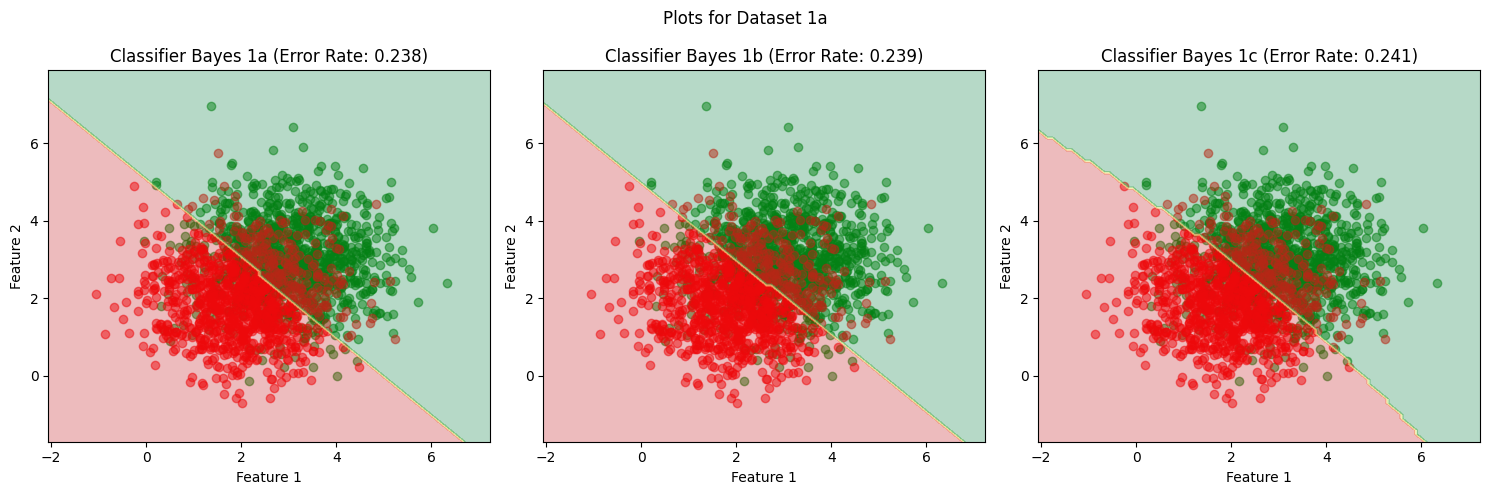

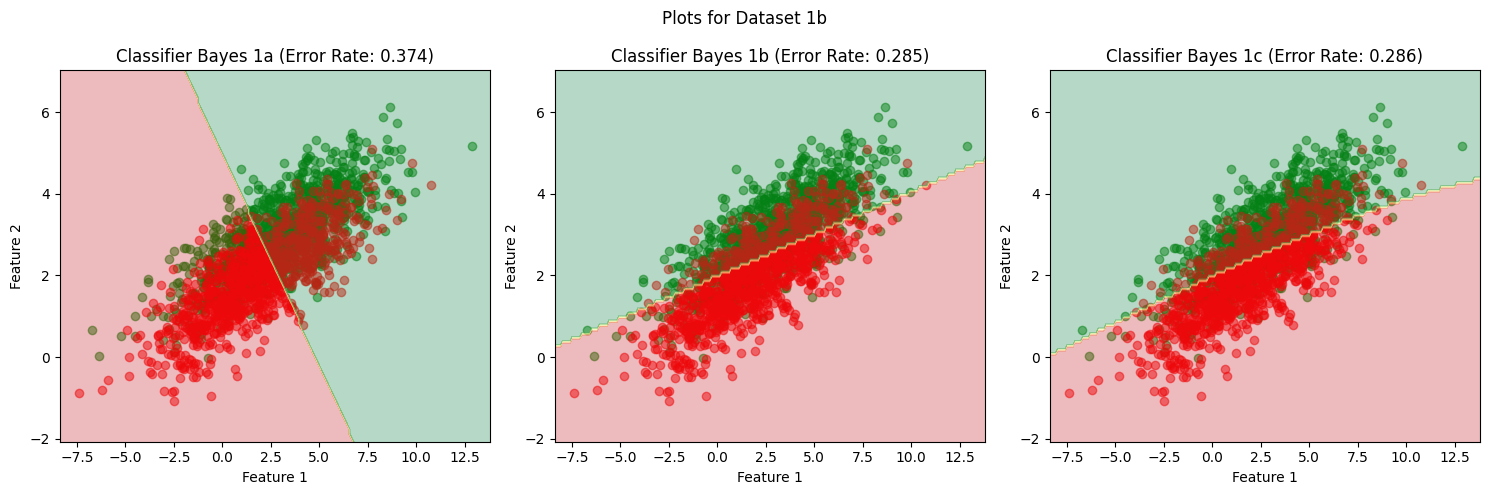

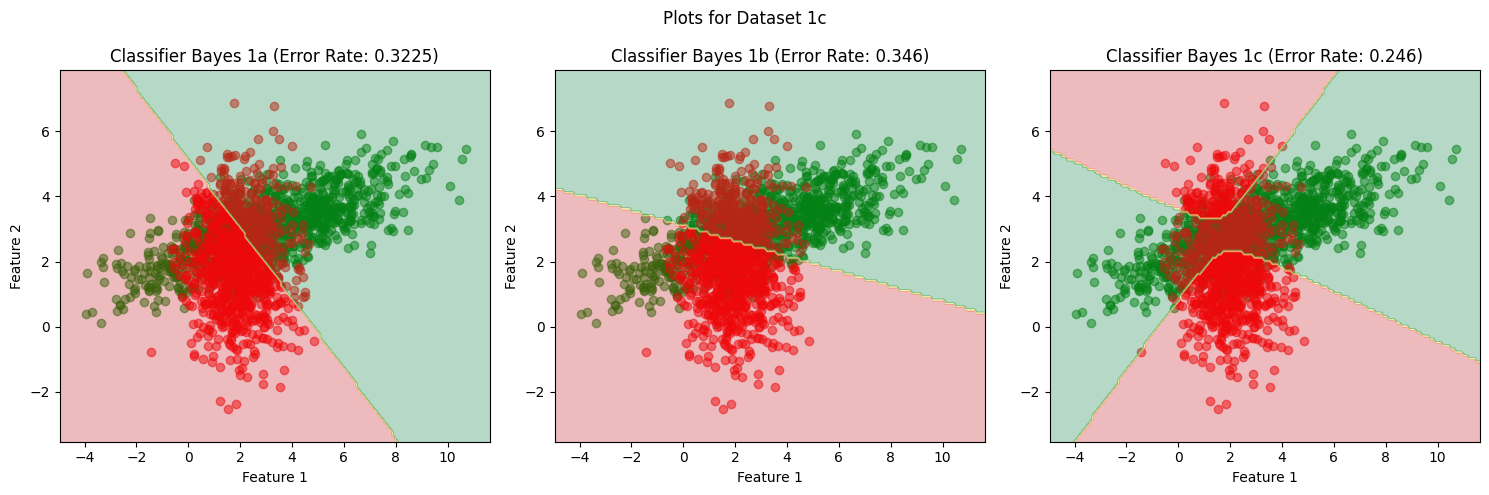

In [36]:
# Cell type : CodeWrite
# Write the code for loading the data, running the three algos, and plotting here.
# Assume that the 3 datasets are named dataset_1a.npz, dataset_1b.npz, dataset_1c.npz re
# (Use the functions written previously.)

np.random.seed(1)

def create_data():
    # dataset_1a
    dataset_1a_X_train_pos = np.random.multivariate_normal([3, 3], np.eye(2), 1000)
    dataset_1a_X_train_neg = np.random.multivariate_normal([2, 2], np.eye(2), 1000)
    dataset_1a_X_train = np.concatenate((dataset_1a_X_train_pos, dataset_1a_X_train_neg), axis=0)
    dataset_1a_Y_train = np.concatenate((np.ones(1000), -1*np.ones(1000)))

    dataset_1a_X_test_pos = np.random.multivariate_normal([3, 3], np.eye(2), 1000)
    dataset_1a_X_test_neg = np.random.multivariate_normal([2, 2], np.eye(2), 1000)
    dataset_1a_X_test = np.concatenate((dataset_1a_X_test_pos, dataset_1a_X_test_neg), axis=0)
    dataset_1a_Y_test = np.concatenate((np.ones(1000), -1*np.ones(1000)))

    np.savez('dataset_1a.npz', X_train=dataset_1a_X_train, Y_train=dataset_1a_Y_train, X_test=dataset_1a_X_test, Y_test=dataset_1a_Y_test)

    # dataset_1b
    cov_matrix = np.array([[7, 2], [2, 1]])

    dataset_1b_X_train_pos = np.random.multivariate_normal([3, 3], cov_matrix, 1000)
    dataset_1b_X_train_neg = np.random.multivariate_normal([2, 2], cov_matrix, 1000)
    dataset_1b_X_train = np.concatenate((dataset_1b_X_train_pos, dataset_1b_X_train_neg), axis=0)
    dataset_1b_Y_train = np.concatenate((np.ones(1000), -1*np.ones(1000)))

    dataset_1b_X_test_pos = np.random.multivariate_normal([3, 3], cov_matrix, 1000)
    dataset_1b_X_test_neg = np.random.multivariate_normal([2, 2], cov_matrix, 1000)
    dataset_1b_X_test = np.concatenate((dataset_1b_X_test_pos, dataset_1b_X_test_neg), axis=0)
    dataset_1b_Y_test = np.concatenate((np.ones(1000), -1*np.ones(1000)))

    np.savez('dataset_1b.npz', X_train=dataset_1b_X_train, Y_train=dataset_1b_Y_train, X_test=dataset_1b_X_test, Y_test=dataset_1b_Y_test)

    # dataset_1c
    cov_matrix_pos = np.array([[7, 2], [2, 1]])
    cov_matrix_neg = np.array([[1, 0], [0, 2]])

    dataset_1c_X_train_pos = np.random.multivariate_normal([3, 3], cov_matrix_pos, 1000)
    dataset_1c_X_train_neg = np.random.multivariate_normal([2, 2], cov_matrix_neg, 1000)
    dataset_1c_X_train = np.concatenate((dataset_1c_X_train_pos, dataset_1c_X_train_neg), axis=0)
    dataset_1c_Y_train = np.concatenate((np.ones(1000), -1*np.ones(1000)))

    dataset_1c_X_test_pos = np.random.multivariate_normal([3, 3], cov_matrix_pos, 1000)
    dataset_1c_X_test_neg = np.random.multivariate_normal([2, 2], cov_matrix_neg, 1000)
    dataset_1c_X_test = np.concatenate((dataset_1c_X_test_pos, dataset_1c_X_test_neg), axis=0)
    dataset_1c_Y_test = np.concatenate((np.ones(1000), -1*np.ones(1000)))

    np.savez('dataset_1c.npz', X_train=dataset_1c_X_train, Y_train=dataset_1c_Y_train, X_test=dataset_1c_X_test, Y_test=dataset_1c_Y_test)


def run_classification(dataset_type):
    if dataset_type == '1a':
        try:
            data = np.load('dataset_1a.npz')
            X_train, Y_train, X_test, Y_test = data['X_train'], data['Y_train'], data['X_test'], data['Y_test']
        except FileNotFoundError:
            print("Uncomment and run the generation code")
            return

    elif dataset_type == '1b':
        try:
            data = np.load('dataset_1b.npz')
            X_train, Y_train, X_test, Y_test = data['X_train'], data['Y_train'], data['X_test'], data['Y_test']
        except FileNotFoundError:
            print("Uncomment and run the generation code")
            return

    elif dataset_type == '1c':
        try:
            data = np.load('dataset_1c.npz')
            X_train, Y_train, X_test, Y_test = data['X_train'], data['Y_train'], data['X_test'], data['Y_test']
        except FileNotFoundError:
            print("Uncomment and run the generation code")
            return

    else:
        raise ValueError("Invalid dataset type")

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle('Plots for Dataset ' + dataset_type)

    classifiers = [Bayes1a, Bayes1b, Bayes1c]
    classifier_names = ["Bayes 1a", "Bayes 1b", "Bayes 1c"]

    for i, classifier in enumerate(classifiers):
        Y_pred_test = classifier(X_train, Y_train, X_test)

        error_rate = np.mean(Y_pred_test != Y_test)

        X_train_pos = X_train[Y_train == 1]
        X_train_neg = X_train[Y_train == -1]

        axs[i].scatter(X_train_pos[:, 0], X_train_pos[:, 1], color='green', alpha=0.5)
        axs[i].scatter(X_train_neg[:, 0], X_train_neg[:, 1], color='red', alpha=0.5)

        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

        Z = classifier(X_train, Y_train, np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        axs[i].contourf(xx, yy, Z, alpha=0.3, cmap='RdYlGn')

        axs[i].set_title("Classifier " + classifier_names[i] + " (Error Rate: {})".format(error_rate))
        axs[i].set_xlabel("Feature 1")
        axs[i].set_ylabel("Feature 2")

    plt.tight_layout()
    plt.show()

# Uncomment the below line to generate the data
# create_data()

run_classification('1a')
run_classification('1b')
run_classification('1c')

<b> Cell type : TextWrite </b>

<center>

|   | Dataset_1a | Dataset_1b | Dataset_1c |
|:---:|:------------:|:------------:|:------------:|
| Bayes1a |      0.238      |     0.374       |     0.3225       |
| Bayes1b |      0.239      |     0.285       |     0.346       |
| Bayes1c |      0.241      |     0.286       |     0.246       |

</center>

Observations:

**(1) For dataset_1a:**


* We observe that the Bayes1a classifer performs best, with an error rate of 0.238. While not significantly better than the performance of the Bayes1b and Bayes1c classifiers, which respectively recieve error rates of 0.239 and 0.241, the Bayes1a classifier is able to more accurately classify the data points in the dataset.

* This is likely due to the fact that the Bayes1a classifier is able to make use of the known covariance of the data, which allows it to more accurately classify the data points. The Bayes1b and Bayes1c classifiers, on the other hand, are unable to make use of the known covariance of the data, which results in a higher error rate for these classifiers.
    
**(2) For dataset_1b:**

* We observe that the Bayes1b classifer performs best, with an error rate of 0.285.

* This is significantly better than the Bayes1a classifier, which has a high error rate of 0.374, since it assumes a certain covariance which is far from the true distribution of the data. Bayes1b does not make any such assumption, hence it is able to find the covariance of the data and classify the data points more accurately.

* The Bayes1c classifier, on the other hand, assumes two different covariances, but performs almost nearly as well, as it is simply calculating these and then classifying the data points. It achieves an error rate of 0.286.
    
**(3) For dataset_1c:**

* Here, there is a significant difference between the performance of Bayes1c from the other two classifiers. Bayes1c performs best, with an error rate of 0.246, while Bayes1a and Bayes1b classifiers have error rates of 0.3225 and 0.346 respectively.

* This is because Bayes1c is able to make use of the different covariances of the data, which allows it to more accurately classify the data points. The Bayes1a and Bayes1b classifiers, on the other hand, are unable to make use of the different covariances of the data because of the assumptions they make, which results in a higher error rate for these classifiers.




<b> Cell type : TextRead </b>

## Problem 2: Multiclass Classifiers

### Problem 2.1: Build Multiclass Classifiers

Derive classifiers under the assumptions below, and use ML estimators to compute and return the results on a test set.

2a) Assume X|Y = a is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume X|Y = a is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume X|Y = a is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.


In [37]:
# Cell type : CodeWrite
# Fill in functions in this cell


def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,2)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,2)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    """

    classes = np.unique(Y_train)
    means = {c: np.mean(X_train[Y_train == c], axis=0) for c in classes}
    pi = {c: np.mean(Y_train == c) for c in classes}
    Sigma = np.array([[1.,0.],[0.,1.]])
    inv_Sigma = np.linalg.inv(Sigma)
    def delta(x, mu, pi_k):
        return x.T @ inv_Sigma @ mu - 0.5 * mu.T @ inv_Sigma @ mu + np.log(pi_k)

    Y_test_pred = np.array([max(classes, key=lambda c: delta(x, means[c], pi[c])) for x in X_test])

    return Y_test_pred

def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,2)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,2)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    """

    classes = np.unique(Y_train)
    means = {c: np.mean(X_train[Y_train == c], axis=0) for c in classes}
    Sigma = np.cov(X_train.T)
    inv_Sigma = np.linalg.inv(Sigma)
    pi = {c: np.mean(Y_train == c) for c in classes}

    def delta(x, mu, pi_k):
        return x.T @ inv_Sigma @ mu - 0.5 * mu.T @ inv_Sigma @ mu + np.log(pi_k)

    Y_test_pred = np.array([max(classes, key=lambda c: delta(x, means[c], pi[c])) for x in X_test])

    return Y_test_pred


def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,2)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,2)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    """

    classes = np.unique(Y_train)
    means = {c: np.mean(X_train[Y_train == c], axis=0) for c in classes}
    covariances = {c: np.cov(X_train[Y_train == c].T) for c in classes}
    inv_covariances = {c: np.linalg.inv(covariances[c]) for c in classes}
    pi = {c: np.mean(Y_train == c) for c in classes}

    def delta(x, mu, inv_Sigma, pi_k, log_det_Sigma):
        return -0.5 * x.T @ inv_Sigma @ x + x.T @ inv_Sigma @ mu - 0.5 * mu.T @ inv_Sigma @ mu - 0.5 * log_det_Sigma + np.log(pi_k)

    Y_test_pred = np.array([max(classes, key=lambda c: delta(x, means[c], inv_covariances[c], pi[c], np.log(np.linalg.det(covariances[c])))) for x in X_test])

    return Y_test_pred

In [40]:
# Cell type : Convenience
# Testing the functions above

np.random.seed(5)

mat=np.array([[1,0],[0,1]])
mat1=np.array([[1.,0.5],[0.5,1.]])
mat2=np.array([[1.,0.5],[0.,1.]])
mat3=np.array([[1.,0.],[0.5,1.]])
mat4=np.array([[1.,0.],[0.,1.]])
X_train_1_1 = np.dot(np.random.randn(1000,2), mat)+np.array([[0.,0.]])
X_train_2_1 = np.dot(np.random.randn(1000,2), mat)+np.array([[0.,2.]])
X_train_3_1 = np.dot(np.random.randn(1000,2), mat)+np.array([[2.,0.]])
X_train_4_1 = np.dot(np.random.randn(1000,2), mat)+np.array([[2.,2.]])
X_train_1 = np.concatenate((X_train_1_1, X_train_2_1, X_train_3_1, X_train_4_1), axis=0)
Y_train_1 = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000)))
X_test_1_1 = np.dot(np.random.randn(1000,2), mat)+np.array([[0.,0.]])
X_test_2_1 = np.dot(np.random.randn(1000,2), mat)+np.array([[0.,2.]])
X_test_3_1 = np.dot(np.random.randn(1000,2), mat)+np.array([[2.,0.]])
X_test_4_1 = np.dot(np.random.randn(1000,2), mat)+np.array([[2.,2.]])
X_test_1 = np.concatenate((X_test_1_1, X_test_2_1, X_test_3_1, X_test_4_1), axis=0)
Y_test_1 = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000)))
Y_pred_test_2a_1 = Bayes2a(X_train_1, Y_train_1, X_test_1)
Y_pred_test_2b_1 = Bayes2b(X_train_1, Y_train_1, X_test_1)
Y_pred_test_2c_1 = Bayes2c(X_train_1, Y_train_1, X_test_1)

# Covariance same but not unity
#dataset 2
import numpy as np
mat=np.array([[1.,0.],[0.,1.]])
mat1=np.array([[7,20],[2,1]])
mat2=np.array([[1.,0.5],[0.,1.]])
mat3=np.array([[1.,0.],[0.5,1.]])
mat4=np.array([[1.,0.],[0.,1.]])
X_train_1_2 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2_2 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,2.]])
X_train_3_2 = np.dot(np.random.randn(1000,2), mat1)+np.array([[2.,0.]])
X_train_4_2 = np.dot(np.random.randn(1000,2), mat1)+np.array([[2.,2.]])
X_train_2 = np.concatenate((X_train_1_2, X_train_2_2, X_train_3_2, X_train_4_2), axis=0)
Y_train_2 = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000)))
X_test_1_2 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2_2 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,2.]])
X_test_3_2 = np.dot(np.random.randn(1000,2), mat1)+np.array([[2.,0.]])
X_test_4_2 = np.dot(np.random.randn(1000,2), mat1)+np.array([[2.,2.]])
X_test_2 = np.concatenate((X_test_1_2, X_test_2_2, X_test_3_2, X_test_4_2), axis=0)
Y_test_2 = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000)))
Y_pred_test_2a_2 = Bayes2a(X_train_2, Y_train_2, X_test_2)
Y_pred_test_2b_2 = Bayes2b(X_train_2, Y_train_2, X_test_2)
Y_pred_test_2c_2 = Bayes2c(X_train_2, Y_train_2, X_test_2)

# Covariance different
#dataset 3
import numpy as np
mat=np.array([[1.,0.],[0.,1.]])
mat1=np.array([[1.,0.5],[0.5,1.25]])
mat2=np.array([[1.,0.5],[0.,1.]])
mat3=np.array([[1.,0.],[0.0,1.]])
mat4=np.array([[2.,5.],[1.,3.]])
X_train_1_3 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2_3 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4_3 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])
X_train_3 = np.concatenate((X_train_1_3, X_train_2_3, X_train_3_3, X_train_4_3), axis=0)
Y_train_3 = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000)))
X_test_1_3 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2_3 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4_3 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])
X_test_3 = np.concatenate((X_test_1_3, X_test_2_3, X_test_3_3, X_test_4_3), axis=0)
Y_test_3 = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000)))
Y_pred_test_2a_3 = Bayes2a(X_train_3, Y_train_3, X_test_3)
Y_pred_test_2b_3 = Bayes2b(X_train_3, Y_train_3, X_test_3)
Y_pred_test_2c_3 = Bayes2c(X_train_3, Y_train_3, X_test_3)

#Uncomment to generate files

# np.savez("dataset_2a.npz", X_train=X_train_1, Y_train=Y_train_1, X_test=X_test_1, Y_test=Y_test_1)
# np.savez("dataset_2b.npz", X_train=X_train_2, Y_train=Y_train_2, X_test=X_test_2, Y_test=Y_test_2)
# np.savez("dataset_2c.npz", X_train=X_train_3, Y_train=Y_train_3, X_test=X_test_3, Y_test=Y_test_3)

def calculate_accuracy(Y_test, Y_pred):
    return np.mean(Y_test == Y_pred)

accuracy_rates = {
    'Dataset_2a': {
        'Bayes2a': calculate_accuracy(Y_test_1, Y_pred_test_2a_1),
        'Bayes2b': calculate_accuracy(Y_test_1, Y_pred_test_2b_1),
        'Bayes2c': calculate_accuracy(Y_test_1, Y_pred_test_2c_1)
    },
    'Dataset_2b': {
        'Bayes2a': calculate_accuracy(Y_test_2, Y_pred_test_2a_2),
        'Bayes2b': calculate_accuracy(Y_test_2, Y_pred_test_2b_2),
        'Bayes2c': calculate_accuracy(Y_test_2, Y_pred_test_2c_2)
    },
    'Dataset_2c': {
        'Bayes2a': calculate_accuracy(Y_test_3, Y_pred_test_2a_3),
        'Bayes2b': calculate_accuracy(Y_test_3, Y_pred_test_2b_3),
        'Bayes2c': calculate_accuracy(Y_test_3, Y_pred_test_2c_3)
    }
}

# for dataset, models in accuracy_rates.items():
#     print(f"Accuracy rates for {dataset}:")
#     for model, accuracy in models.items():
#         print(f"\t{model}: {accuracy:.4f}")


Accuracy rates for Dataset_2a:
	Bayes2a: 0.7155
	Bayes2b: 0.7145
	Bayes2c: 0.7143
Accuracy rates for Dataset_2b:
	Bayes2a: 0.2988
	Bayes2b: 0.4007
	Bayes2c: 0.4005
Accuracy rates for Dataset_2c:
	Bayes2a: 0.6565
	Bayes2b: 0.6947
	Bayes2c: 0.8075


### Problem 2.2
For this part you have to demonstrate, using data that you will simulate as specified in Problem 2 description (assuming there are 4 classes), that Bayes2a performs best for data that follow distribution 2a), Bayes2b performs best for data that follow distribution 2b), and Bayes2c performs best for data that follow distribution 2c). In the next CodeWrite cell, plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the regions corresponding to each class with colors of your choice, coloring should be consistent across all plots, and there should be corresponding legend). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem
to explain) your observations regarding the nine learnt classifiers, and also give the error rate of the three classifiers on the three datasets as 3x3 table, with appropriately named rows and columns.

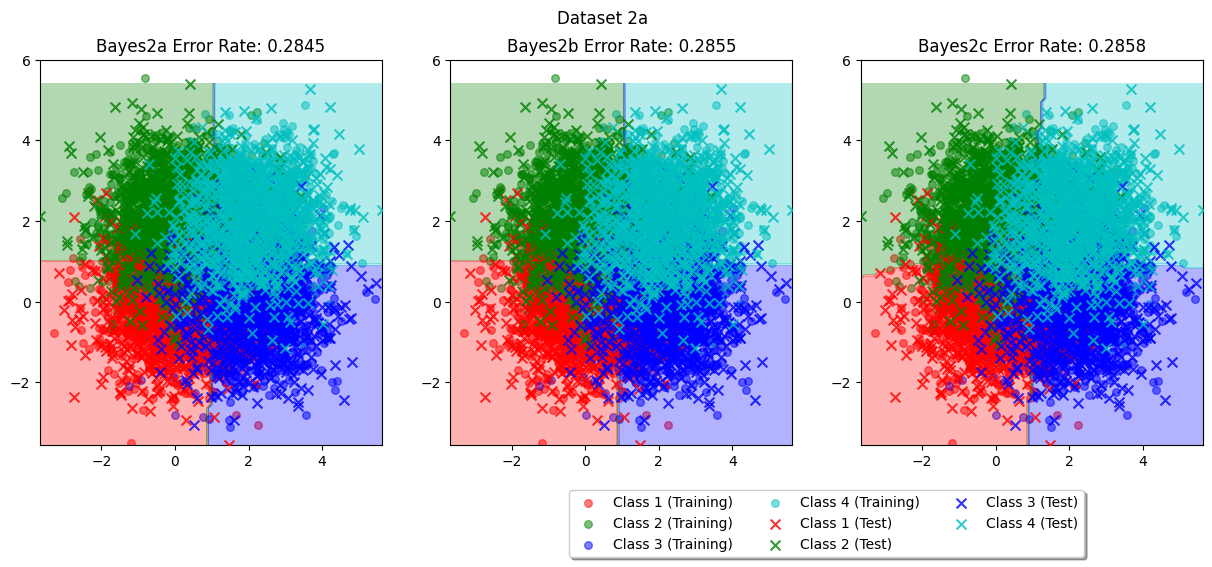

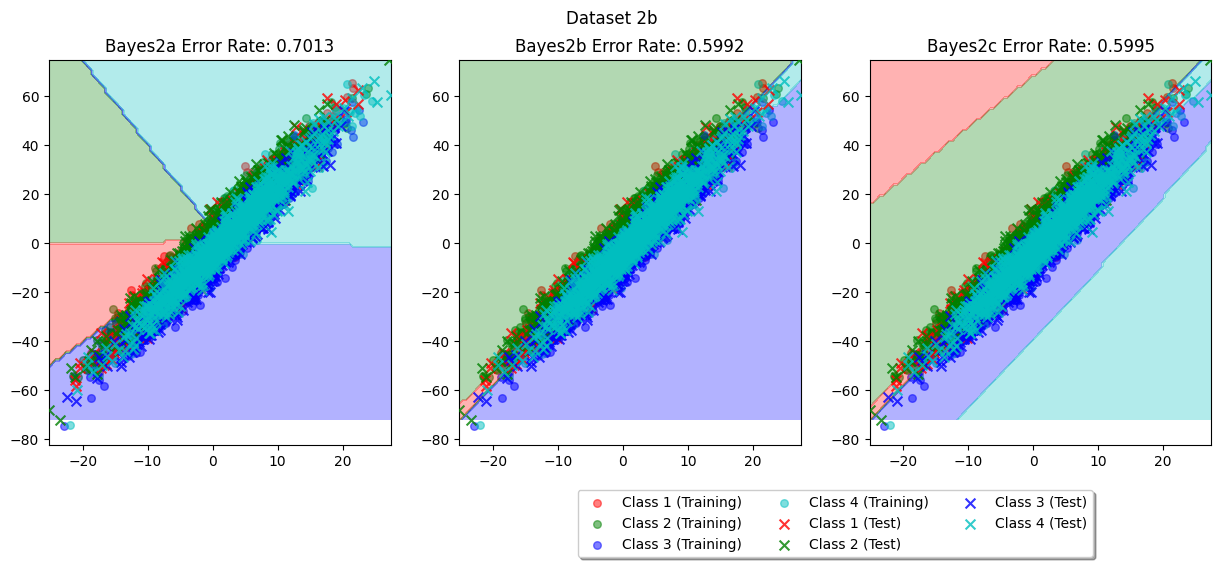

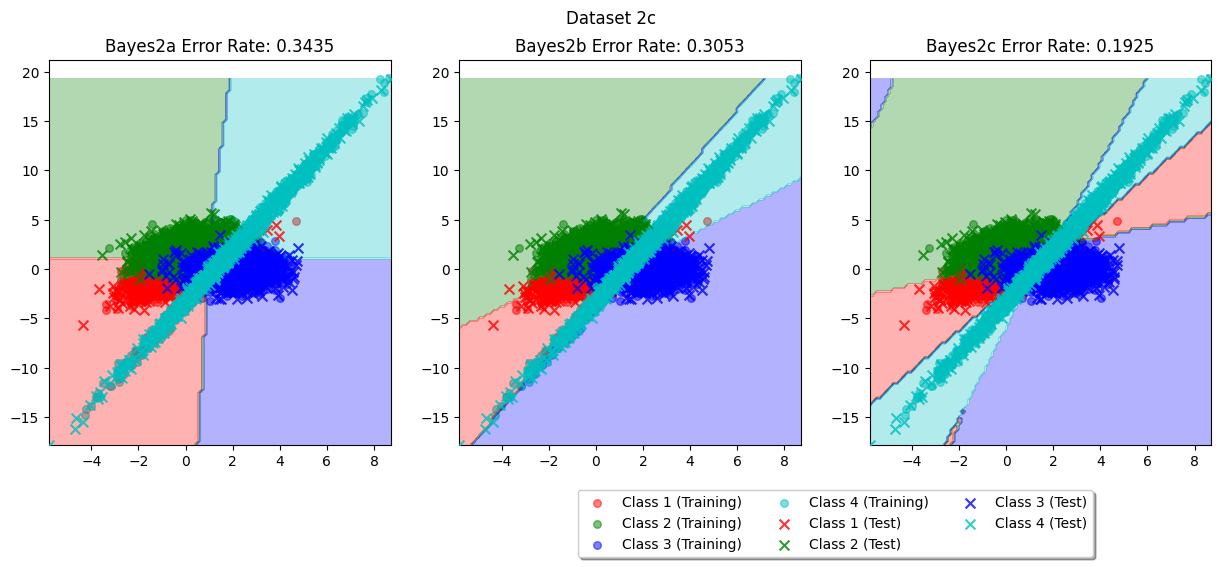

In [39]:
# Cell type : CodeWrite
# Write the code for loading the data, running the three algos, and plotting here.
# Assume that the datasets are called dataset_2a.npz, dataset_2b.npz, dataset_2c.npz res
# (Use the functions written previously.)

# Read data from .npz files
data_2a = np.load("dataset_2a.npz")
data_2b = np.load("dataset_2b.npz")
data_2c = np.load("dataset_2c.npz")

# Split data into training and test sets
X_train_2a, Y_train_2a, X_test_2a, Y_test_2a = data_2a['X_train'], data_2a['Y_train'], data_2a['X_test'], data_2a['Y_test']
X_train_2b, Y_train_2b, X_test_2b, Y_test_2b = data_2b['X_train'], data_2b['Y_train'], data_2b['X_test'], data_2b['Y_test']
X_train_2c, Y_train_2c, X_test_2c, Y_test_2c = data_2c['X_train'], data_2c['Y_train'], data_2c['X_test'], data_2c['Y_test']

# Feed data into classifiers
Y_pred_test_2a_1 = Bayes2a(X_train_2a, Y_train_2a, X_test_2a)
Y_pred_test_2b_1 = Bayes2b(X_train_2a, Y_train_2a, X_test_2a)
Y_pred_test_2c_1 = Bayes2c(X_train_2a, Y_train_2a, X_test_2a)

Y_pred_test_2a_2 = Bayes2a(X_train_2b, Y_train_2b, X_test_2b)
Y_pred_test_2b_2 = Bayes2b(X_train_2b, Y_train_2b, X_test_2b)
Y_pred_test_2c_2 = Bayes2c(X_train_2b, Y_train_2b, X_test_2b)

Y_pred_test_2a_3 = Bayes2a(X_train_2c, Y_train_2c, X_test_2c)
Y_pred_test_2b_3 = Bayes2b(X_train_2c, Y_train_2c, X_test_2c)
Y_pred_test_2c_3 = Bayes2c(X_train_2c, Y_train_2c, X_test_2c)

def calculate_error_rate(Y_test, Y_pred):
    return np.mean(Y_test != Y_pred)

error_rates = {
    'Dataset_2a': {
        'Bayes2a': calculate_error_rate(Y_test_1, Y_pred_test_2a_1),
        'Bayes2b': calculate_error_rate(Y_test_1, Y_pred_test_2b_1),
        'Bayes2c': calculate_error_rate(Y_test_1, Y_pred_test_2c_1)
    },
    'Dataset_2b': {
        'Bayes2a': calculate_error_rate(Y_test_2, Y_pred_test_2a_2),
        'Bayes2b': calculate_error_rate(Y_test_2, Y_pred_test_2b_2),
        'Bayes2c': calculate_error_rate(Y_test_2, Y_pred_test_2c_2)
    },
    'Dataset_2c': {
        'Bayes2a': calculate_error_rate(Y_test_3, Y_pred_test_2a_3),
        'Bayes2b': calculate_error_rate(Y_test_3, Y_pred_test_2b_3),
        'Bayes2c': calculate_error_rate(Y_test_3, Y_pred_test_2c_3)
    }
}

# print(error_rates)

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


colors = ['r', 'g', 'b', 'c']


cmap_light = ListedColormap(colors[:len(np.unique(Y_train_1))])

# plot function
def plot_decision_regions(X_train, Y_train, X_test, Y_test, Y_pred_2a, Y_pred_2b, Y_pred_2c, error_rates, title):
    plt.figure(figsize=(15, 5))

    # Plot Bayes2a
    plt.subplot(1, 3, 1)
    for idx, class_label in enumerate(np.unique(Y_train)):
        plt.scatter(X_train[Y_train == class_label, 0], X_train[Y_train == class_label, 1], marker='o', label=f'Class {int(class_label)} (Training)', alpha=0.5, s=30, color=colors[idx])
    for idx, class_label in enumerate(np.unique(Y_test)):
        plt.scatter(X_test[Y_test == class_label, 0], X_test[Y_test == class_label, 1], marker='x', label=f'Class {int(class_label)} (Test)', alpha=0.8, s=50, zorder=10, color=colors[idx])
    plt.contourf(xx, yy, Z_2a, cmap=cmap_light, alpha=0.3)
    plt.title(f'Bayes2a Error Rate: {error_rates["Bayes2a"]:.4f}')

    # Plot Bayes2b
    plt.subplot(1, 3, 2)
    for idx, class_label in enumerate(np.unique(Y_train)):
        plt.scatter(X_train[Y_train == class_label, 0], X_train[Y_train == class_label, 1], marker='o', label=f'Class {int(class_label)} (Training)', alpha=0.5, s=30, color=colors[idx])
    for idx, class_label in enumerate(np.unique(Y_test)):
        plt.scatter(X_test[Y_test == class_label, 0], X_test[Y_test == class_label, 1], marker='x', label=f'Class {int(class_label)} (Test)', alpha=0.8, s=50, zorder=10, color=colors[idx])
    plt.contourf(xx, yy, Z_2b, cmap=cmap_light, alpha=0.3)
    plt.title(f'Bayes2b Error Rate: {error_rates["Bayes2b"]:.4f}')

    # Plot Bayes2c
    plt.subplot(1, 3, 3)
    for idx, class_label in enumerate(np.unique(Y_train)):
        plt.scatter(X_train[Y_train == class_label, 0], X_train[Y_train == class_label, 1], marker='o', label=f'Class {int(class_label)} (Training)', alpha=0.5, s=30, color=colors[idx])
    for idx, class_label in enumerate(np.unique(Y_test)):
        plt.scatter(X_test[Y_test == class_label, 0], X_test[Y_test == class_label, 1], marker='x', label=f'Class {int(class_label)} (Test)', alpha=0.8, s=50, zorder=10, color=colors[idx])
    plt.contourf(xx, yy, Z_2c, cmap=cmap_light, alpha=0.3)
    plt.title(f'Bayes2c Error Rate: {error_rates["Bayes2c"]:.4f}')

    plt.suptitle(title)
    plt.legend(loc='upper center', bbox_to_anchor=(-0.1, -0.1), fancybox=True, shadow=True, ncol=3)
    plt.show()

# Generate the meshgrid for decision boundary plots
xx, yy = np.meshgrid(np.linspace(X_test_2a[:, 0].min(), X_test_2a[:, 0].max(), 100),
                     np.linspace(X_test_2a[:, 1].min(), X_test_2a[:, 1].max(), 100))

# Plot for Dataset 2a
Z_2a = Bayes2a(X_train_2a, Y_train_2a, np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_2b = Bayes2b(X_train_2a, Y_train_2a, np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_2c = Bayes2c(X_train_2a, Y_train_2a, np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plot_decision_regions(X_train_2a, Y_train_2a, X_test_2a, Y_test_2a, Y_pred_test_2a_1, Y_pred_test_2b_1, Y_pred_test_2c_1, error_rates['Dataset_2a'], 'Dataset 2a')

# Plot for Dataset 2b
xx, yy = np.meshgrid(np.linspace(X_test_2b[:, 0].min(), X_test_2b[:, 0].max(), 100),
                     np.linspace(X_test_2b[:, 1].min(), X_test_2b[:, 1].max(), 100))
Z_2a = Bayes2a(X_train_2b, Y_train_2b, np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_2b = Bayes2b(X_train_2b, Y_train_2b, np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_2c = Bayes2c(X_train_2b, Y_train_2b, np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plot_decision_regions(X_train_2b, Y_train_2b, X_test_2b, Y_test_2b, Y_pred_test_2a_2, Y_pred_test_2b_2, Y_pred_test_2c_2, error_rates['Dataset_2b'], 'Dataset 2b')

# Plot for Dataset 2c
xx, yy = np.meshgrid(np.linspace(X_test_2c[:, 0].min(), X_test_2c[:, 0].max(), 100),
                     np.linspace(X_test_2c[:, 1].min(), X_test_2c[:, 1].max(), 100))
Z_2a = Bayes2a(X_train_2c, Y_train_2c, np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_2b = Bayes2b(X_train_2c, Y_train_2c, np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_2c = Bayes2c(X_train_2c, Y_train_2c, np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plot_decision_regions(X_train_2c, Y_train_2c, X_test_2c, Y_test_2c, Y_pred_test_2a_3, Y_pred_test_2b_3, Y_pred_test_2c_3, error_rates['Dataset_2c'], 'Dataset 2c')


<b> Cell type : TextWrite </b> (Write your observations and table of errors here)

Error Rate:

<center>

|         | Dataset_2a | Dataset_2b | Dataset_2c |
|:---:|:------------:|:------------:|:------------:|
| Bayes2a | 0.2845     | 0.7013     | 0.3435     |
| Bayes2b | 0.2855     | 0.5992     | 0.3053     |
| Bayes2c | 0.2858     | 0.5995     | 0.1925    |

</center>

Observations:

**(1) In Dataset 2a:**




*   It is observed Bayes2a performs best on Dataset 2a as compared to others as it matches the assumption of identity covariance.


*   The minimum error rate for this dataset is given by Bayes2a, Bayes2b has slightly more error rate compared to Bayes2a and Bayes2c performs the worst.


*   Though the error rate of all the classifiers are almost equal which can be also observed from the plots as they are identical for all classifiers.





**(2) In Dataset 2b:**


*   It is observed Bayes2b performs best on Dataset 2b as compared to others as it matches the assumption of same but unknown covariance.


*   The minimum error rate for this dataset is given by Bayes2b, Bayes2c has slightly more error rate compared to Bayes2b and Bayes2a performs the worst.


*   It can also be observed from the plots that Bayes2c and Bayes2b covers most of the data points into the right class whereas Bayes2a covers least data points making it the worse classifier in this case due to assuming identity covariance.

**(3) In Dataset 2c:**

*   It is observed Bayes2c performs best on Dataset 2c as compared to others as it matches the assumption of different unknown covariances.


*   The minimum error rate for this dataset is given by Bayes2c, Bayes2b and Bayes2a have more error rate due to  assuming of same covariances and making Bayes2a the worst due to assuming of identity covariance.


*   It can also be observed from the plots that Bayes2c covers most of the data points into the right class whereas Bayes2b and Bayes2a covers least data points making them the worse classifier in this case.

